# Notebook file for checking if code is working properly.
### Scroll to bottom for a help section if things are broken

In [1]:
import numpy as np
from numpy import inf
from scipy.constants import *
import matplotlib.pyplot as plt

from IDRIM.constants import *
from IDRIM.relations import *
from IDRIM.graph import *
from IDRIM.commons import *
from IDRIM.checks import *
from IDRIM.checks import *
from IDRIM.genesis import *
from IDRIM.ymodcom import *

# Parameters / Setup

In [2]:
dummy={}#need dummy dictionary to generate arrays
mu_array, Cp_array, Ce_array, wp_array, X, X = Regeneration(dummy, OVERRIDE=-1)
del X
#^^^regeneration would generate RI array, don't want that as it needs specific wavelength
#use override = -1 to block it generating.
#Need plasma freq array, will generate RI for each wavelength separately.

OVERRIDE Detected. Regenerating.
Solving Chemical Potential. This may take some time.
Mu Generated and Saved.
Generating Phonon Heat Capacity.
Phonon Heat Capacity generated and saved.
Generating Electron Heat Capacity.
Electron Heat Capacity generated and saved.
Generating Plasma Frequency
Plasma Frequency array generated and saved.


REGENERATION COMPLETE.


In [3]:
Wavel_array = np.linspace(1200*nm, 1400*nm, DIM)
Freq_array = (c*2*pi)/(Wavel_array)
Perm_model = Permittivity(Freq_array, wp_array[0])
Perm_Exp = Permittivity(Freq_array, wp0)
n_ito = np.sqrt(Perm_model)
#Parameters
n_sub = 1.5#hardcoded this way in f:TMM_Run but option if you need it
d_ito = 407*nm #thickness of ITO sample
d_sub = 150000*nm #thickness of substrate
ENZ_FREQ = 212#THZ. ENZ frequency of sample.
print("Substrate Thickness", d_sub/1e-6, "in micrometres")

Substrate Thickness 150.00000000000003 in micrometres


# Transfer Matrix Method Check

In [4]:
RO, TO, AO = OldMatrixMethod(n_ito, n_sub, Freq_array, d_ito, d_sub, DIM)
RM, TM, AM = MatrixMethod(n_ito, n_sub, Wavel_array, d_ito, d_sub, DIM)

'\nThese two plots should overlap perfectly. \nIf not, something has gone wrong with the Transfer matrix method code/module.\nThis will not detect problems with sample parameters!\n'

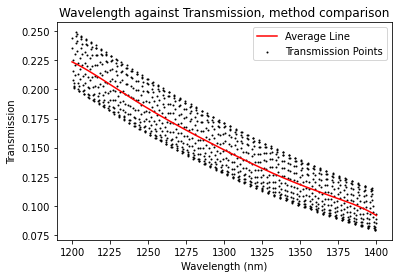

In [5]:
#plt.plot(Wavel_array/nm, TO, label="Mathematica Matrix Method", color="blue")
#plt.plot(Wavel_array/nm, TM, label="TMM Module", color="blue")
plt.scatter(Wavel_array/nm, TM, s=1, color="black", label="Transmission Points")
plt.xlabel("Wavelength (nm)")
plt.ylabel("Transmission")
plt.title("Wavelength against Transmission, method comparison")
#plt.xlim(1200,1220)
#
POLY = np.polyfit(Wavel_array, TM, 6)
x = Wavel_array
y = POLY[0]*x**6 + POLY[1]*x**5 + POLY[2]*x**4 + POLY[3]*x**3 + POLY[4]*x**2+POLY[5]*x**1 + POLY[6]

plt.plot(Wavel_array/nm, y, color="red", label="Average Line")
plt.legend()
'''
These two plots should overlap perfectly. 
If not, something has gone wrong with the Transfer matrix method code/module.
This will not detect problems with sample parameters!
''' 

'Look at units of Y-axis. This should be tiny (1e-15 for my test) otherwise you have a problem\nwith the TMM code.'

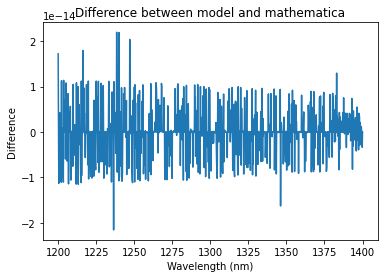

In [6]:
DELTA = TM-TO
plt.plot(Wavel_array/nm, DELTA)
plt.xlabel("Wavelength (nm)")
plt.ylabel("Difference")
plt.title("Difference between model and mathematica")
'''Look at units of Y-axis. This should be tiny (1e-15 for my test) otherwise you have a problem
with the TMM code.'''

# Permittivity and ENZ Frequency

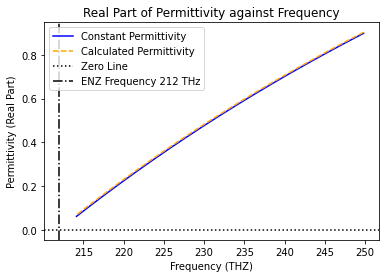

In [7]:
plt.plot(Freq_array/(2*pi*1e12), Perm_Exp.real, label="Constant Permittivity", color="blue")
plt.plot(Freq_array/(2*pi*1e12), Perm_model.real, label="Calculated Permittivity", color="orange", linestyle="dashed")
plt.xlabel("Frequency (THZ)")
plt.ylabel("Permittivity (Real Part)")
plt.axhline(0, color="black", linestyle="dotted", label="Zero Line")
plt.axvline(ENZ_FREQ, color="black", linestyle="dashdot", label="ENZ Frequency %d THz" %ENZ_FREQ)
plt.title("Real Part of Permittivity against Frequency")
plt.legend()

'This isnt going to be as accurate as the above delta plot, but again, look for major differences.\nAs of writing this, I got a max of 0.012 difference.'

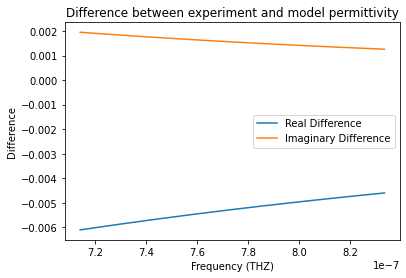

In [8]:
DELTA2 = Perm_Exp - Perm_model
plt.plot(Freq_array/(2e12*pi*c), DELTA2.real, label="Real Difference")
plt.plot(Freq_array/(2e12*pi*c), DELTA2.imag, label="Imaginary Difference")
plt.xlabel("Frequency (THZ)")
plt.ylabel("Difference")
plt.title("Difference between experiment and model permittivity")
plt.legend()
'''This isnt going to be as accurate as the above delta plot, but again, look for major differences.
As of writing this, I got a max of 0.012 difference.'''

# Help Section
## Matrix Method
If this is broken, not much can be done (assuming you haven't fiddled with the code), as the matrix method is an external python module that is imported. Only thing I can suggest is replacing it with another, or extending f:OldMatrixMethod to be able to include angles.

## Permittivity
If this is broken, it means your sample parameters aren't setup correctly. You should have a plasma frequency at rest (wp0) from experiment. This should be roughly equal to the model calculating plasma frequency, which comes from the chemical potential. Fixing this involves using the chemical potential solver notebook.
List of sample parameters that might change between samples.
>N

>eps_inf

>me_min

>wp0

>gamma0
